## Implement a KNN model to classify the animals in to categories

#Introduction
# K-Nearest Neighbors (KNN) for Animal Classification

This notebook demonstrates the implementation of a K-Nearest Neighbors (KNN) model to classify animals into different categories based on their features. The KNN algorithm is a simple, non-parametric, and instance-based learning method used for classification and regression tasks.

In [54]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Import libraries for data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization

# Import libraries for machine learning model and evaluation
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and cross-validation
from sklearn.neighbors import KNeighborsClassifier  # KNN algorithm
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation

# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Load the animal features dataset from a CSV file
zoo_df = pd.read_csv('zoo.csv')

# Load the class information dataset from an Excel file
class_df = pd.read_excel('class.xlsx')

# Display the first few rows and column names of zoo_df to verify its structure
print("Zoo DataFrame Columns:", zoo_df.columns)
print(zoo_df.head())

# Display the first few rows and column names of class_df to verify its structure
print("\nClass DataFrame Columns:", class_df.columns)
print(class_df.head())

Zoo DataFrame Columns: Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     

In [48]:
# Assuming 'class_type' is the correct column in zoo_df and 'Class_Number' is in class_df
# If the column names are different, replace them with the correct ones
animal_df = zoo_df.merge(class_df, how='left', left_on='class_type', right_on='Class_Number')

# Display the first few rows of the merged dataset to verify the merge
animal_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type_x,Class_Number,Number_Of_Animal_Species_In_Class,class_type_y,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [68]:
# Merge the datasets on the 'class_type' column to combine features with class labels
# Adjust the column names if they differ in your datasets
animal_df = zoo_df.merge(class_df, how='left', left_on='class_type', right_on='Class_Number')

# Display the first few rows of the merged dataset to verify the merge
animal_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type_x,Class_Number,Number_Of_Animal_Species_In_Class,class_type_y,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [72]:
# Drop unnecessary columns from the merged DataFrame
# 'Animal_Names' and 'Number_Of_Animal_Species_In_Class' are not needed for classification
# 'class_type_y' is the descriptive class name, which we can keep for reference
# 'class_type_x' is the original class type number, which we will use as the target variable

zoo_cleaned = animal_df.drop(['Animal_Names', 'Number_Of_Animal_Species_In_Class', 'class_type_y'], axis=1)

# Rename 'class_type_x' to 'class_type' for clarity
zoo_cleaned.rename(columns={'class_type_x': 'class_type'}, inplace=True)

# Display the first few rows of the cleaned DataFrame
zoo_cleaned.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


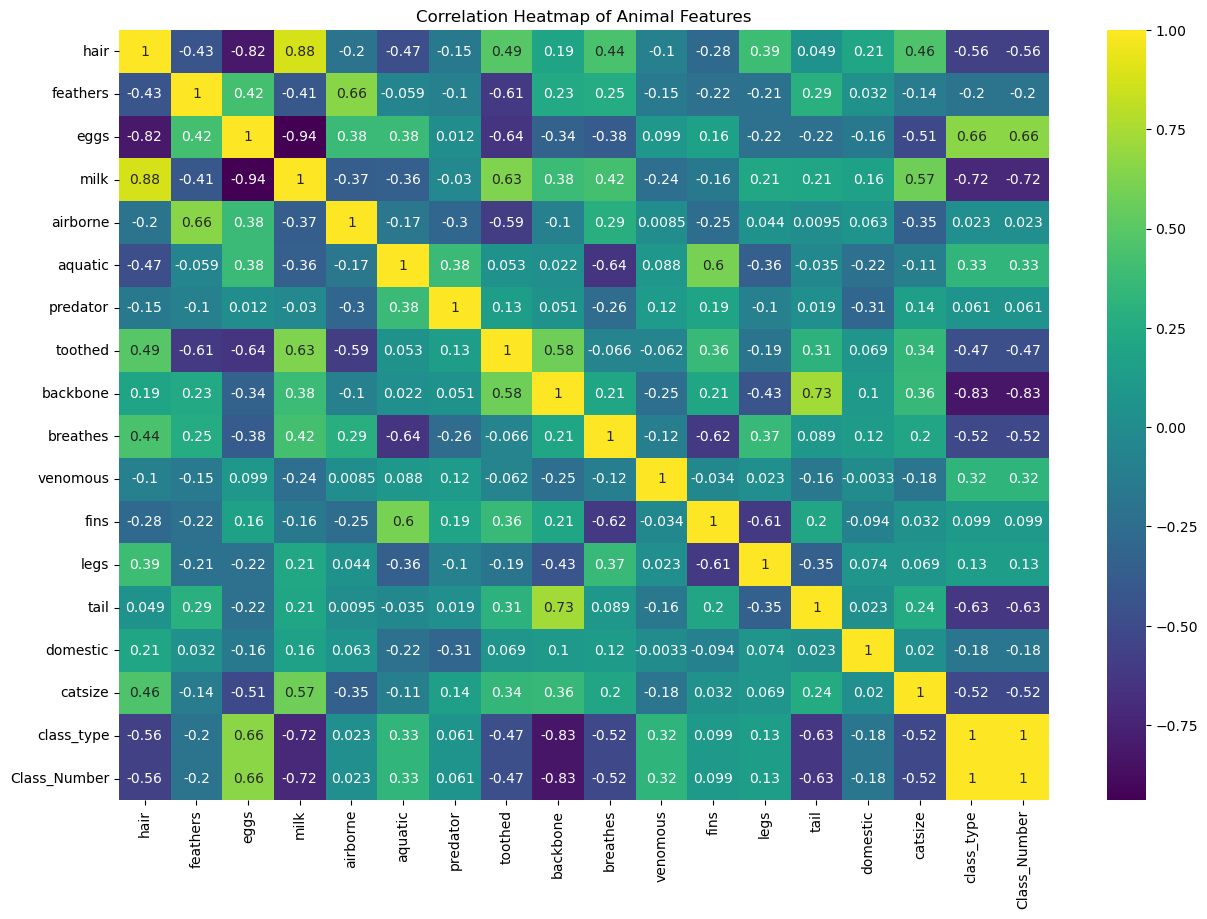

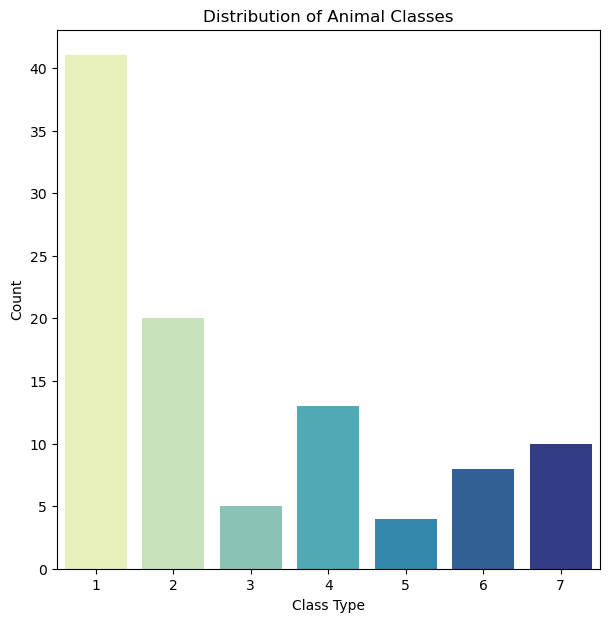

In [76]:
# Drop non-numeric columns before calculating the correlation matrix
# Assuming 'animal_name' is the only non-numeric column
numeric_zoo = zoo_cleaned.drop(['animal_name'], axis=1)

# Visualize the correlation between features using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_zoo.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Animal Features')
plt.show()

# Visualize the distribution of animal classes
plt.figure(figsize=(7, 7))
sns.countplot(x='class_type', data=zoo_cleaned, palette='YlGnBu')
plt.title('Distribution of Animal Classes')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

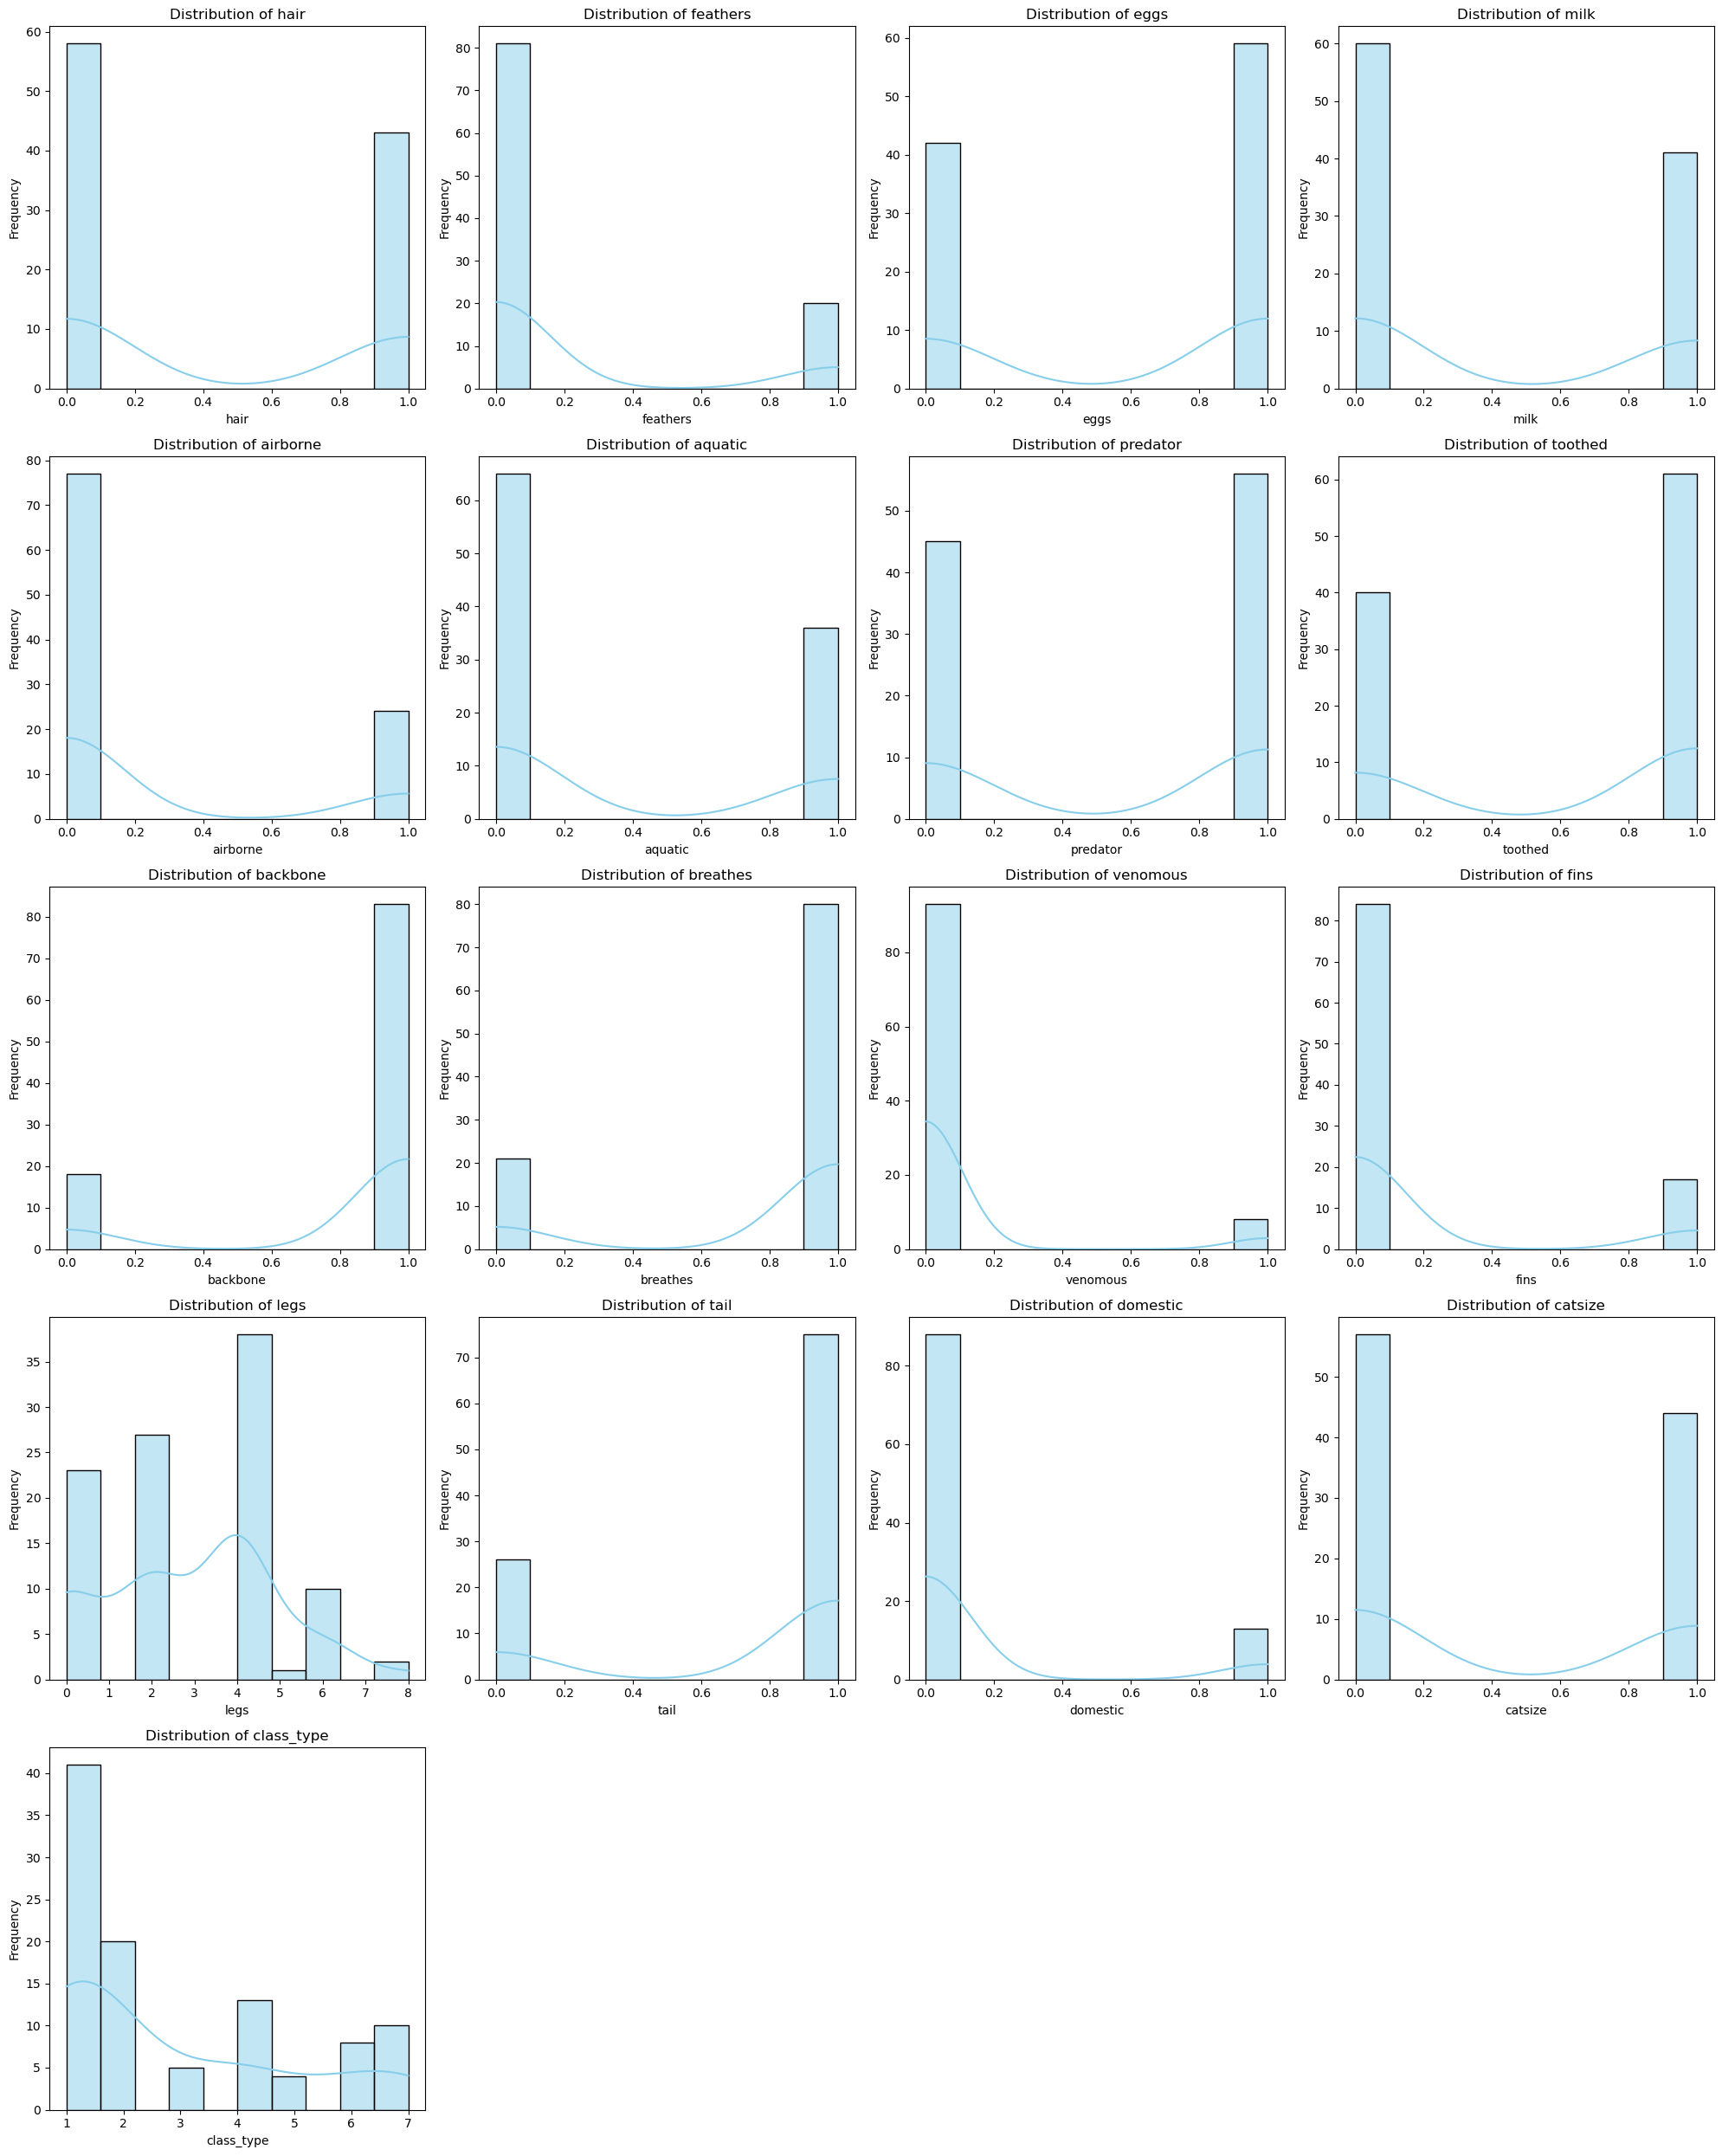

In [94]:
# Visualize the distribution of each feature
features = zoo_cleaned.columns[:-1]  # Exclude the target column

# Calculate the number of rows and columns needed for subplots
num_features = len(features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are plotted

# Set up the matplotlib figure
plt.figure(figsize=(20, 5 * num_rows))  # Adjust height based on number of rows
for i, feature in enumerate(features, 1):
  plt.subplot(num_rows, num_cols, i)
  sns.histplot(zoo_cleaned[feature], bins=10, kde=True, color='skyblue')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [80]:
# Separate features (X) and target variable (y) from the dataset
X = zoo_cleaned.drop('class_type', axis=1)
y = zoo_cleaned['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Display the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (70, 18), Testing set shape: (31, 18)


In [84]:
# Drop unnecessary columns from the merged DataFrame
# 'Animal_Names' and 'Number_Of_Animal_Species_In_Class' are not needed for classification
# 'class_type_y' is the descriptive class name, which we can keep for reference
# 'class_type_x' is the original class type number, which we will use as the target variable

zoo_cleaned = animal_df.drop(['Animal_Names', 'Number_Of_Animal_Species_In_Class', 'class_type_y', 'animal_name'], axis=1)

# Rename 'class_type_x' to 'class_type' for clarity
zoo_cleaned.rename(columns={'class_type_x': 'class_type'}, inplace=True)

# Display the first few rows of the cleaned DataFrame
zoo_cleaned.head()

# Separate features (X) and target variable (y) from the dataset
# Ensure that only numeric columns are included in X
X = zoo_cleaned.drop('class_type', axis=1)
y = zoo_cleaned['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Display the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (70, 17), Testing set shape: (31, 17)


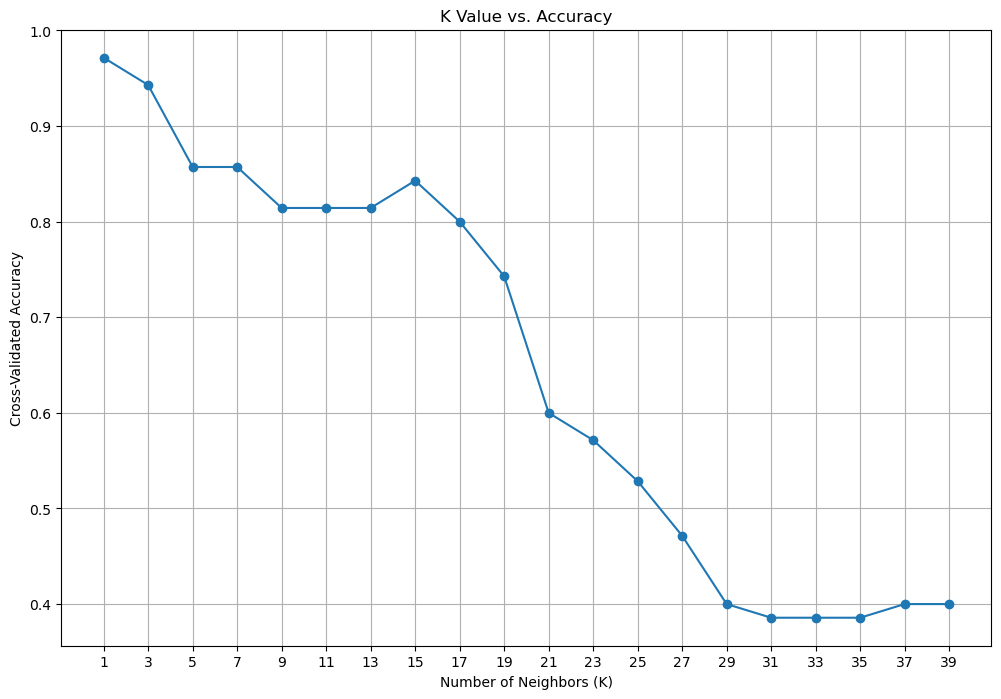

The optimal number of neighbors is: 1


In [86]:
# Define a range of K values to test
k_values = np.arange(1, 40, 2)
mean_accuracy = []

# Evaluate each K value using cross-validation
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())

# Plot the K values against their cross-validated accuracy
plt.figure(figsize=(12, 8))
plt.plot(k_values, mean_accuracy, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Value vs. Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Identify the best K value
best_k = k_values[np.argmax(mean_accuracy)]
print(f"The optimal number of neighbors is: {best_k}")

In [88]:
# Initialize the KNN classifier with the optimal K value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance using a confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



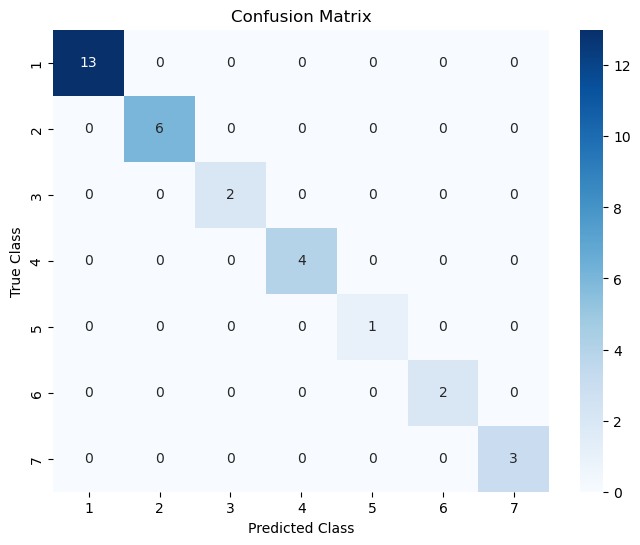

In [90]:
# Visualize the confusion matrix using a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [92]:
# Summarize the findings and performance of the KNN model
print("The KNN model achieved high accuracy with the optimal K value.")
print("Considerations for future improvements could include feature engineering or using different distance metrics.")

The KNN model achieved high accuracy with the optimal K value.
Considerations for future improvements could include feature engineering or using different distance metrics.
